<a href="https://colab.research.google.com/github/Pam-Pam29/Group18-Formative-2-Text-Classification/blob/main/Group18_Formative_2_Text_Classification_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Our text sequence classification model

In [12]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB

Missing Values:
Sentence     0
Sentiment    0
dtype: int64

Unique Sentiments:
['positive' 'negative' 'neutral']

Sentiment Distribution:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


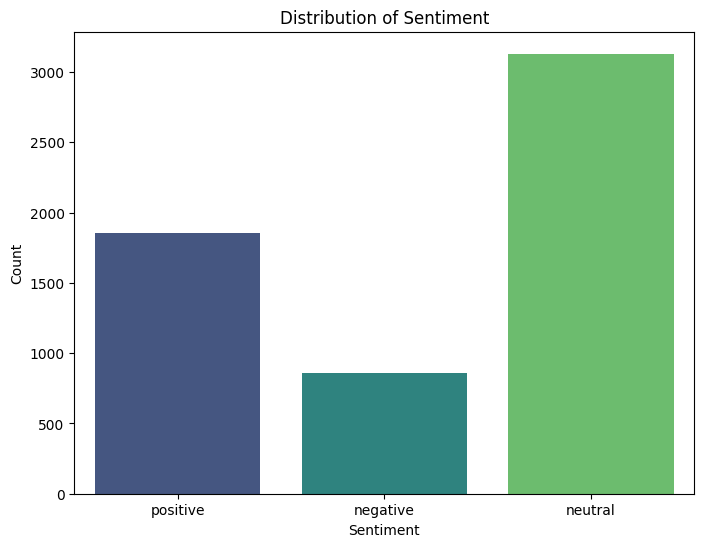


Descriptive statistics for sentence_length and word_count:
       sentence_length   word_count
count      5842.000000  5842.000000
mean        117.022253    21.004793
std          56.420425    10.306465
min           9.000000     2.000000
25%          72.000000    13.000000
50%         107.000000    19.000000
75%         150.000000    27.000000
max         315.000000    81.000000


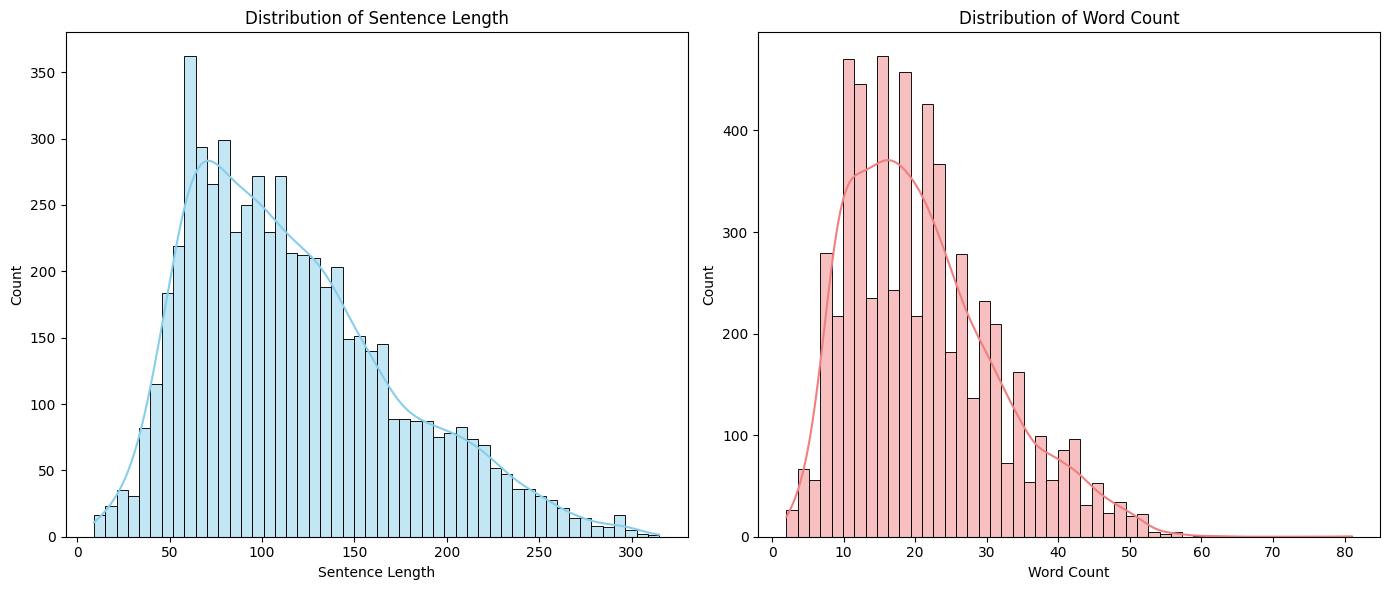

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)

print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Sentiments:")
print(df['Sentiment'].unique())

print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Add new columns for text characteristics
df['sentence_length'] = df['Sentence'].apply(len)
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split()))

print("\nDescriptive statistics for sentence_length and word_count:")
print(df[['sentence_length', 'word_count']].describe())

# Create and display histograms for 'sentence_length' and 'word_count'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['sentence_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
import nltk
import re

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add this to download punkt_tab
except LookupError:
    nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^"\w\s’]', '', text) # Keep apostrophes common in contractions
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text) # Remove digits
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any remaining non-alphabetic characters except spaces
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    text = " ".join(filtered_sentence)
    return text

# Apply the preprocessing function
df['cleaned_sentence'] = df['Sentence'].apply(preprocess_text)

print("First 5 rows of 'Sentence' and 'cleaned_sentence':")
print(df[['Sentence', 'cleaned_sentence']].head())
print("\nInfo on the updated DataFrame with 'cleaned_sentence' column:")
df.info()

First 5 rows of 'Sentence' and 'cleaned_sentence':
                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                    cleaned_sentence  
0  geosolutions technology leverage benefon gps s...  
1                       esi lows bk real possibility  
2  last quarter componenta net sales doubled eurm...  
3  according finnishrussian chamber commerce majo...  
4  swedish buyout firm sold remaining percent sta...  

Info on the updated DataFrame with 'cleaned_sentence' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sentence        

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Sentiment' column
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Display the mapping
print("Sentiment Label Mapping:")
for i, sentiment in enumerate(label_encoder.classes_):
    print(f"{sentiment}: {i}")

# Split the data into training and testing sets
X = df['cleaned_sentence']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of sentiment in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of sentiment in test set:")
print(y_test.value_counts(normalize=True))

Sentiment Label Mapping:
negative: 0
neutral: 1
positive: 2

Shape of X_train: (4673,)
Shape of X_test: (1169,)
Shape of y_train: (4673,)
Shape of y_test: (1169,)

Distribution of sentiment in training set:
sentiment_encoded
1    0.535844
2    0.316927
0    0.147229
Name: proportion, dtype: float64

Distribution of sentiment in test set:
sentiment_encoded
1    0.535500
2    0.317365
0    0.147134
Name: proportion, dtype: float64


# LOGISTIC REGRESSION EXPERIMENTS

**Importing libraries**

In [17]:
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [18]:
# Problem Framing and Labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["y"] = label_encoder.fit_transform(df["Sentiment"])

print("Classes:", list(label_encoder.classes_))
df["Sentiment"].value_counts()

Classes: ['negative', 'neutral', 'positive']


,count
Sentiment,
neutral,3130
positive,1852
negative,860


**EDA**

Insightful Visualization

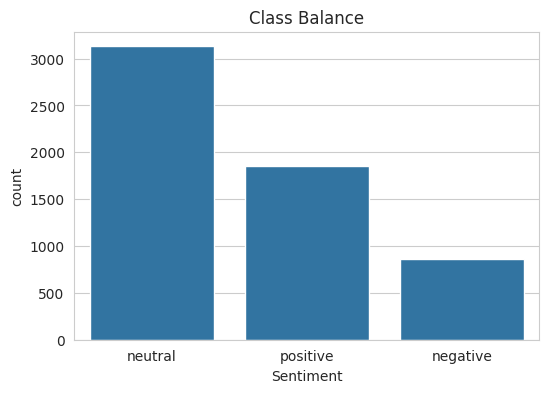

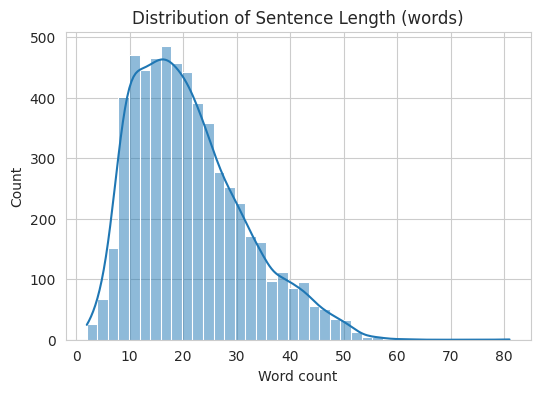

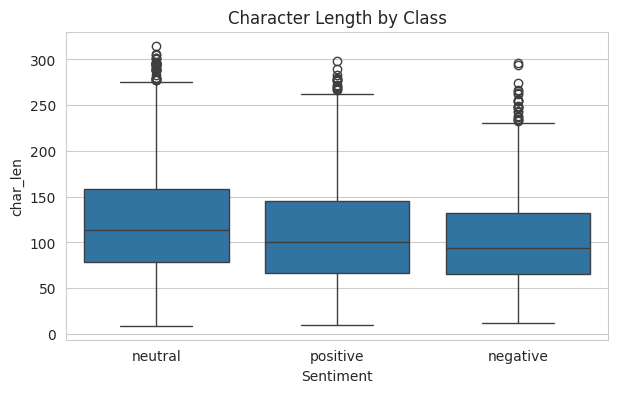

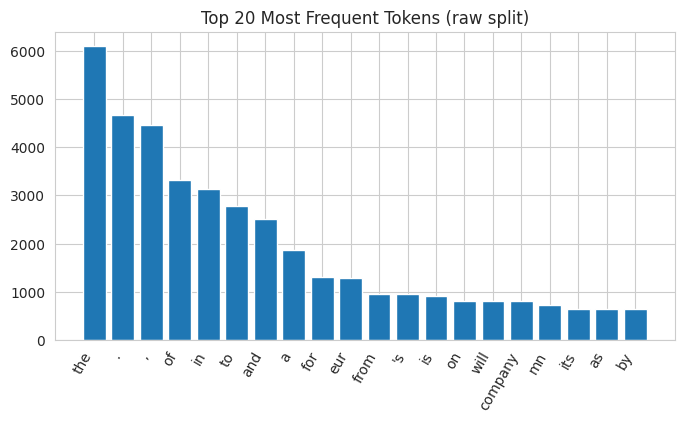

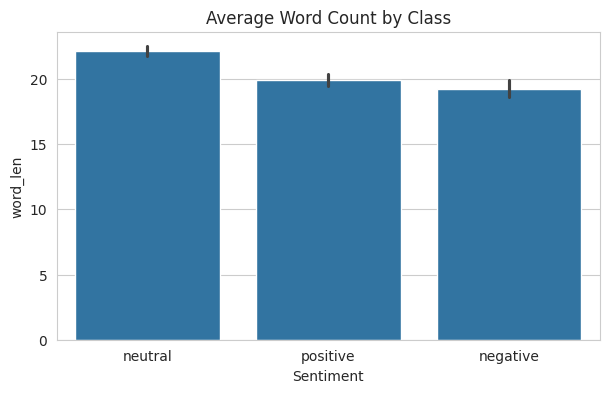

In [19]:
from collections import Counter

sns.set_style("whitegrid")

# Basic length features
df["char_len"] = df["Sentence"].astype(str).apply(len)
df["word_len"] = df["Sentence"].astype(str).apply(lambda s: len(s.split()))

# Class balance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index)
plt.title("Class Balance")
plt.show()

# Sentence length in words
plt.figure(figsize=(6,4))
sns.histplot(df["word_len"], bins=40, kde=True)
plt.title("Distribution of Sentence Length (words)")
plt.xlabel("Word count")
plt.show()

# Sentence length in characters by class
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Sentiment", y="char_len", order=df["Sentiment"].value_counts().index)
plt.title("Character Length by Class")
plt.show()

# Top words overall (basic token split, later we do real preprocessing)
all_tokens = " ".join(df["Sentence"].astype(str)).lower().split()
top_words = Counter(all_tokens).most_common(20)

plt.figure(figsize=(8,4))
plt.bar([w for w,_ in top_words], [c for _,c in top_words])
plt.xticks(rotation=60, ha="right")
plt.title("Top 20 Most Frequent Tokens (raw split)")
plt.show()

# Average word length by class
plt.figure(figsize=(7,4))
sns.barplot(data=df, x="Sentiment", y="word_len", estimator=np.mean, order=df["Sentiment"].value_counts().index)
plt.title("Average Word Count by Class")
plt.show()

**Train, Val, Test, and Split**

Keeping the consistent across all experiments

In [20]:
from sklearn.model_selection import train_test_split

X_text = df["Sentence"].astype(str).values
y = df["y"].values

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=SEED, stratify=y
)

X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_train_text, y_train, test_size=0.2, random_state=SEED, stratify=y_train
)

print("Train/Val/Test:", len(X_train_text), len(X_val_text), len(X_test_text))

Train/Val/Test: 3738 935 1169


**Shared Preprocessing and Utilities**

Adding tokenization depending on the embedding or feature method (for ex: $ to money, % to percentage, ...)

In [21]:
nltk.download("punkt")
nltk.download("stopwords")

STOP_WORDS = set(stopwords.words("english"))

_money = re.compile(r"(\$|€|£)\s?\d+(?:[\.,]\d+)?[mbkMBK]?\b")
_percent = re.compile(r"\b\d+(?:\.\d+)?%")
_ticker = re.compile(r"\$[A-Za-z]{1,6}\b")  # e.g. $ESI
_number = re.compile(r"\b\d+(?:[\.,]\d+)?\b")

def normalize_financial_tokens(text: str) -> str:
    text = _ticker.sub(" <TICKER> ", text)
    text = _money.sub(" <MONEY> ", text)
    text = _percent.sub(" <PERCENT> ", text)
    text = _number.sub(" <NUMBER> ", text)
    return text

def basic_clean(text: str) -> str:
    text = text.lower()
    text = normalize_financial_tokens(text)
    # Keep <TOKENS> and words; remove other punctuation
    text = re.sub(r"[^a-z0-9<>\s_]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def apply_negation_join(tokens):
    # turns ["not","good"] -> ["not_good"] (helps sentiment)
    out = []
    i = 0
    while i < len(tokens):
        if tokens[i] in {"not", "no", "never"} and i+1 < len(tokens):
            out.append(tokens[i] + "_" + tokens[i+1])
            i += 2
        else:
            out.append(tokens[i])
            i += 1
    return out

def tokens_for_tfidf(text: str):
    """
    TF-IDF adaptation:
    - remove stopwords (reduces noise for sparse models)
    - keep negation join
    - return tokens as strings
    """
    text = basic_clean(text)
    toks = word_tokenize(text)
    toks = apply_negation_join(toks)
    toks = [t for t in toks if t not in STOP_WORDS and len(t) > 1]
    return toks

def tokens_for_embeddings(text: str):
    """
    Embedding adaptation (Word2Vec/GloVe/random):
    - remove stopwords (helps average pooling)
    - keep negation join
    - keep special <MONEY> etc (domain signals)
    """
    text = basic_clean(text)
    toks = word_tokenize(text)
    toks = apply_negation_join(toks)
    toks = [t for t in toks if (t not in STOP_WORDS) and (len(t) > 1 or t.startswith("<"))]
    return toks

# quick sanity check
print(tokens_for_embeddings("I do not like $ESI at $2.50, down 5% today."))

['not_like', '<', '<', '<', 'today']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Evaluation and Experiment Tracking**

In [22]:
# Evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

def evaluate_predictions(y_true, y_pred, label_encoder=None, title=""):
    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average="macro")
    f1_weighted = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred)
    print(title)
    print("Accuracy:", acc)
    print("F1 (macro):", f1_macro)
    print("F1 (weighted):", f1_weighted)
    print("\nClassification report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_ if label_encoder else None))
    return {"accuracy": acc, "f1_macro": f1_macro, "f1_weighted": f1_weighted, "confusion_matrix": cm}

**Experiment 1: Logistic Regression with TF-IDF Features (Baseline)**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

def identity_tokenizer(x):
    return x

X_train_toks = [tokens_for_tfidf(t) for t in X_train_text]
X_val_toks   = [tokens_for_tfidf(t) for t in X_val_text]
X_test_toks  = [tokens_for_tfidf(t) for t in X_test_text]

tfidf_lr_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        tokenizer=identity_tokenizer,
        preprocessor=identity_tokenizer,
        token_pattern=None,      # important since we supply tokens
        lowercase=False
    )),
    ("lr", LogisticRegression(
        max_iter=3000,
        multi_class="multinomial",
        random_state=SEED
    ))
])

param_grid = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__min_df": [2, 5],
    "tfidf__max_df": [0.9, 0.95],
    "lr__C": [0.1, 1, 3, 10],
    "lr__penalty": ["l2"],
    "lr__solver": ["lbfgs"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
grid_tfidf = GridSearchCV(tfidf_lr_pipe, param_grid, scoring="f1_macro", cv=cv, n_jobs=-1, verbose=1)
grid_tfidf.fit(X_train_toks, y_train)

print("Best params:", grid_tfidf.best_params_)
print("Best CV f1_macro:", grid_tfidf.best_score_)

# Validate
val_pred = grid_tfidf.predict(X_val_toks)
tfidf_metrics = evaluate_predictions(y_val, val_pred, label_encoder, title="TF-IDF + LR (Validation)")

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs', 'tfidf__max_df': 0.9, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}
Best CV f1_macro: 0.553689433772
TF-IDF + LR (Validation)
Accuracy: 0.6598930481283423
F1 (macro): 0.5728706275826804
F1 (weighted): 0.6547378650377262

Classification report:
               precision    recall  f1-score   support

    negative       0.32      0.28      0.30       138
     neutral       0.69      0.78      0.74       501
    positive       0.75      0.62      0.68       296

    accuracy                           0.66       935
   macro avg       0.59      0.56      0.57       935
weighted avg       0.66      0.66      0.65       935



**Sentence Embeddings for LogReg**

In [24]:
# Sentence Vector Builders

from sklearn.preprocessing import StandardScaler

def build_idf_weights(corpus_tokens):
    """
    Build IDF lookup from training corpus tokens, for TF-IDF weighted averaging.
    """
    vec = TfidfVectorizer(
        tokenizer=identity_tokenizer,
        preprocessor=identity_tokenizer,
        token_pattern=None,
        lowercase=False
    )
    vec.fit(corpus_tokens)
    idf = vec.idf_
    vocab = vec.vocabulary_
    idf_lookup = {w: idf[idx] for w, idx in vocab.items()}
    return idf_lookup

def sentence_mean_embedding(tokens, emb_lookup, dim):
    vecs = [emb_lookup[t] for t in tokens if t in emb_lookup]
    if len(vecs) == 0:
        return np.zeros(dim, dtype=np.float32)
    return np.mean(vecs, axis=0)

def sentence_tfidf_weighted_embedding(tokens, emb_lookup, idf_lookup, dim):
    vecs = []
    weights = []
    for t in tokens:
        if t in emb_lookup and t in idf_lookup:
            vecs.append(emb_lookup[t])
            weights.append(idf_lookup[t])
    if len(vecs) == 0:
        return np.zeros(dim, dtype=np.float32)
    vecs = np.array(vecs, dtype=np.float32)
    weights = np.array(weights, dtype=np.float32)
    return (vecs * weights[:, None]).sum(axis=0) / (weights.sum() + 1e-9)

def build_X_embeddings(texts, token_fn, emb_lookup, dim, weighted=False, idf_lookup=None):
    toks_list = [token_fn(t) for t in texts]
    if weighted:
        assert idf_lookup is not None
        X = np.vstack([sentence_tfidf_weighted_embedding(toks, emb_lookup, idf_lookup, dim) for toks in toks_list])
    else:
        X = np.vstack([sentence_mean_embedding(toks, emb_lookup, dim) for toks in toks_list])
    return X

In [25]:
# LogReg Tuning Function For Dense Embeddings

from sklearn.model_selection import GridSearchCV

def tune_lr_dense(X_train, y_train):
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(
            max_iter=3000,
            multi_class="multinomial",
            random_state=SEED
        ))
    ])
    param_grid = {
        "lr__C": [0.1, 1, 3, 10],
        "lr__solver": ["lbfgs"],
        "lr__penalty": ["l2"]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    grid = GridSearchCV(pipe, param_grid, scoring="f1_macro", cv=cv, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    return grid

**Experiment 2: Random Embeddings**

In [26]:
# Random Embeddings and LR

EMB_DIM = 100

train_tokens_emb = [tokens_for_embeddings(t) for t in X_train_text]
val_tokens_emb   = [tokens_for_embeddings(t) for t in X_val_text]
test_tokens_emb  = [tokens_for_embeddings(t) for t in X_test_text]

# Build vocab from training
vocab = sorted(set([tok for sent in train_tokens_emb for tok in sent]))
rng = np.random.default_rng(SEED)

random_emb = {w: rng.normal(0, 1, size=(EMB_DIM,)).astype(np.float32) for w in vocab}

Xtr_rand = build_X_embeddings(X_train_text, tokens_for_embeddings, random_emb, EMB_DIM, weighted=False)
Xva_rand = build_X_embeddings(X_val_text, tokens_for_embeddings, random_emb, EMB_DIM, weighted=False)
Xte_rand = build_X_embeddings(X_test_text, tokens_for_embeddings, random_emb, EMB_DIM, weighted=False)

grid_rand = tune_lr_dense(Xtr_rand, y_train)
print("Best params:", grid_rand.best_params_)
print("Best CV f1_macro:", grid_rand.best_score_)

val_pred = grid_rand.predict(Xva_rand)
rand_metrics = evaluate_predictions(y_val, val_pred, label_encoder, title="Random-Mean Embeddings + LR (Validation)")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best params: {'lr__C': 3, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best CV f1_macro: 0.4189221976587699
Random-Mean Embeddings + LR (Validation)
Accuracy: 0.5550802139037433
F1 (macro): 0.43585890522831444
F1 (weighted): 0.5228388418207984

Classification report:
               precision    recall  f1-score   support

    negative       0.43      0.17      0.25       138
     neutral       0.60      0.80      0.69       501
    positive       0.44      0.32      0.37       296

    accuracy                           0.56       935
   macro avg       0.49      0.43      0.44       935
weighted avg       0.53      0.56      0.52       935



**Expirements 3 and 4: Word2Vex Skip-Gram and CBOW**

In [27]:
# Train Word2Vec and Run Skip-Gram and CBOW Experiments

!pip -q install gensim

from gensim.models import Word2Vec

def train_word2vec(tokens_list, sg, vector_size=100, window=5, min_count=2, workers=4):
    model = Word2Vec(
        sentences=tokens_list,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        sg=sg,               # 1=skipgram, 0=cbow
        workers=workers,
        seed=SEED,
        epochs=15
    )
    emb = {w: model.wv[w] for w in model.wv.index_to_key}
    return emb

# Token lists for training W2V
train_tokens_emb = [tokens_for_embeddings(t) for t in X_train_text]

# --- Skip-gram ---
w2v_sg = train_word2vec(train_tokens_emb, sg=1, vector_size=EMB_DIM, window=5, min_count=2)

Xtr_sg = build_X_embeddings(X_train_text, tokens_for_embeddings, w2v_sg, EMB_DIM, weighted=False)
Xva_sg = build_X_embeddings(X_val_text, tokens_for_embeddings, w2v_sg, EMB_DIM, weighted=False)
Xte_sg = build_X_embeddings(X_test_text, tokens_for_embeddings, w2v_sg, EMB_DIM, weighted=False)

grid_sg = tune_lr_dense(Xtr_sg, y_train)
print("Skip-gram best params:", grid_sg.best_params_)
print("Skip-gram best CV f1_macro:", grid_sg.best_score_)
sg_val_pred = grid_sg.predict(Xva_sg)
sg_metrics = evaluate_predictions(y_val, sg_val_pred, label_encoder, title="Word2Vec Skip-gram Mean + LR (Validation)")

# --- CBOW ---
w2v_cbow = train_word2vec(train_tokens_emb, sg=0, vector_size=EMB_DIM, window=5, min_count=2)

Xtr_cb = build_X_embeddings(X_train_text, tokens_for_embeddings, w2v_cbow, EMB_DIM, weighted=False)
Xva_cb = build_X_embeddings(X_val_text, tokens_for_embeddings, w2v_cbow, EMB_DIM, weighted=False)
Xte_cb = build_X_embeddings(X_test_text, tokens_for_embeddings, w2v_cbow, EMB_DIM, weighted=False)

grid_cb = tune_lr_dense(Xtr_cb, y_train)
print("CBOW best params:", grid_cb.best_params_)
print("CBOW best CV f1_macro:", grid_cb.best_score_)
cb_val_pred = grid_cb.predict(Xva_cb)
cb_metrics = evaluate_predictions(y_val, cb_val_pred, label_encoder, title="Word2Vec CBOW Mean + LR (Validation)")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 34.2 MB/s eta 0:00:00
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Skip-gram best params: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Skip-gram best CV f1_macro: 0.506417666230898
Word2Vec Skip-gram Mean + LR (Validation)
Accuracy: 0.6256684491978609
F1 (macro): 0.4959094894806131
F1 (weighted): 0.5956124715328186

Classification report:
               precision    recall  f1-score   support

    negative       0.42      0.16      0.23       138
     neutral       0.67      0.85      0.75       501
    positive       0.56      0.47      0.51       296

    accuracy                           0.63       935
   macro avg       0.55      0.49      0.50       935
weighted avg       0.60      0.63      0.60       935

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


CBOW best params: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
CBOW best CV f1_macro: 0.44847203648523093
Word2Vec CBOW Mean + LR (Validation)
Accuracy: 0.6042780748663101
F1 (macro): 0.44916812913347043
F1 (weighted): 0.5608744823216636

Classification report:
               precision    recall  f1-score   support

    negative       0.41      0.09      0.15       138
     neutral       0.63      0.86      0.73       501
    positive       0.54      0.41      0.46       296

    accuracy                           0.60       935
   macro avg       0.53      0.45      0.45       935
weighted avg       0.57      0.60      0.56       935



**Experiment: Pretrained GloVe and LR**

In [28]:
# Download GloVe and Build Sentence Vectors

import os, zipfile, urllib.request

GLOVE_DIM = 100
GLOVE_DIR = "/mnt/data/glove"
GLOVE_ZIP = os.path.join(GLOVE_DIR, "glove.6B.zip")
GLOVE_TXT = os.path.join(GLOVE_DIR, f"glove.6B.{GLOVE_DIM}d.txt")

os.makedirs(GLOVE_DIR, exist_ok=True)

if not os.path.exists(GLOVE_TXT):
    # Download from Stanford NLP
    glove_url = "https://nlp.stanford.edu/data/glove.6B.zip"
    if not os.path.exists(GLOVE_ZIP):
        urllib.request.urlretrieve(glove_url, GLOVE_ZIP)
    with zipfile.ZipFile(GLOVE_ZIP, "r") as z:
        z.extractall(GLOVE_DIR)

def load_glove(path):
    emb = {}
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vec = np.array(parts[1:], dtype=np.float32)
            emb[word] = vec
    return emb

glove_emb = load_glove(GLOVE_TXT)
print("GloVe vocab size:", len(glove_emb))

Xtr_gl = build_X_embeddings(X_train_text, tokens_for_embeddings, glove_emb, GLOVE_DIM, weighted=False)
Xva_gl = build_X_embeddings(X_val_text, tokens_for_embeddings, glove_emb, GLOVE_DIM, weighted=False)
Xte_gl = build_X_embeddings(X_test_text, tokens_for_embeddings, glove_emb, GLOVE_DIM, weighted=False)

grid_gl = tune_lr_dense(Xtr_gl, y_train)
print("GloVe best params:", grid_gl.best_params_)
print("GloVe best CV f1_macro:", grid_gl.best_score_)
gl_val_pred = grid_gl.predict(Xva_gl)
glove_metrics = evaluate_predictions(y_val, gl_val_pred, label_encoder, title="GloVe Mean + LR (Validation)")

GloVe vocab size: 400000
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GloVe best params: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
GloVe best CV f1_macro: 0.5649322510207196
GloVe Mean + LR (Validation)
Accuracy: 0.6577540106951871
F1 (macro): 0.5791395750686202
F1 (weighted): 0.6468329160757146

Classification report:
               precision    recall  f1-score   support

    negative       0.51      0.33      0.40       138
     neutral       0.70      0.80      0.75       501
    positive       0.61      0.56      0.58       296

    accuracy                           0.66       935
   macro avg       0.61      0.57      0.58       935
weighted avg       0.65      0.66      0.65       935



**Experiment 6: TF-IDF Weighted Average Sentence Embeddings**

In [29]:
#  TF-IDF Weighted Avg Sentence Embeddings + LR
#  (Word2Vec Skip-gram vectors, TF-IDF IDF weights)

idf_lookup = build_idf_weights([tokens_for_tfidf(t) for t in X_train_text])

Xtr_wavg = build_X_embeddings(X_train_text, tokens_for_embeddings, w2v_sg, EMB_DIM, weighted=True, idf_lookup=idf_lookup)
Xva_wavg = build_X_embeddings(X_val_text, tokens_for_embeddings, w2v_sg, EMB_DIM, weighted=True, idf_lookup=idf_lookup)
Xte_wavg = build_X_embeddings(X_test_text, tokens_for_embeddings, w2v_sg, EMB_DIM, weighted=True, idf_lookup=idf_lookup)

grid_wavg = tune_lr_dense(Xtr_wavg, y_train)
print("TFIDF-weighted best params:", grid_wavg.best_params_)
print("TFIDF-weighted best CV f1_macro:", grid_wavg.best_score_)
wavg_val_pred = grid_wavg.predict(Xva_wavg)
wavg_metrics = evaluate_predictions(y_val, wavg_val_pred, label_encoder, title="TF-IDF Weighted Avg (W2V Skip-gram) + LR (Validation)")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


TFIDF-weighted best params: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
TFIDF-weighted best CV f1_macro: 0.5116624538050807
TF-IDF Weighted Avg (W2V Skip-gram) + LR (Validation)
Accuracy: 0.627807486631016
F1 (macro): 0.4978540262831923
F1 (weighted): 0.5985544473798131

Classification report:
               precision    recall  f1-score   support

    negative       0.39      0.16      0.23       138
     neutral       0.67      0.85      0.75       501
    positive       0.57      0.47      0.52       296

    accuracy                           0.63       935
   macro avg       0.55      0.49      0.50       935
weighted avg       0.60      0.63      0.60       935



**Final Evaluation on the Test Set and Unified Comparison Tables and Plots**

In [30]:
# Evaluate Best Models On Test and Creating Comaprison Table

results = []

def log_result(name, estimator, Xte, y_test):
    y_pred = estimator.predict(Xte)
    m = evaluate_predictions(y_test, y_pred, label_encoder, title=f"{name} (TEST)")
    results.append({
        "Model": "LogisticRegression",
        "Embedding/Features": name,
        "Accuracy": m["accuracy"],
        "F1_macro": m["f1_macro"],
        "F1_weighted": m["f1_weighted"]
    })
    return m["confusion_matrix"]

# TF-IDF pipeline uses tokens input
cm_tfidf = log_result("TF-IDF (ngrams tuned)", grid_tfidf.best_estimator_, X_test_toks, y_test)

cm_rand  = log_result("Random mean embeddings", grid_rand.best_estimator_, Xte_rand, y_test)
cm_sg    = log_result("Word2Vec Skip-gram mean", grid_sg.best_estimator_, Xte_sg, y_test)
cm_cb    = log_result("Word2Vec CBOW mean", grid_cb.best_estimator_, Xte_cb, y_test)
cm_glove = log_result("GloVe mean", grid_gl.best_estimator_, Xte_gl, y_test)
cm_wavg  = log_result("TF-IDF weighted avg (W2V SG)", grid_wavg.best_estimator_, Xte_wavg, y_test)

results_df = pd.DataFrame(results).sort_values("F1_macro", ascending=False).reset_index(drop=True)
results_df

TF-IDF (ngrams tuned) (TEST)
Accuracy: 0.6629597946963216
F1 (macro): 0.5500951472560289
F1 (weighted): 0.6498147493535598

Classification report:
               precision    recall  f1-score   support

    negative       0.26      0.17      0.21       172
     neutral       0.69      0.80      0.74       626
    positive       0.74      0.67      0.70       371

    accuracy                           0.66      1169
   macro avg       0.56      0.55      0.55      1169
weighted avg       0.64      0.66      0.65      1169

Random mean embeddings (TEST)
Accuracy: 0.544054747647562
F1 (macro): 0.4125245256149115
F1 (weighted): 0.5085158550099562

Classification report:
               precision    recall  f1-score   support

    negative       0.33      0.13      0.19       172
     neutral       0.59      0.79      0.68       626
    positive       0.44      0.32      0.37       371

    accuracy                           0.54      1169
   macro avg       0.46      0.41      0.41      11

,Model,Embedding/Features,Accuracy,F1_macro,F1_weighted
0,LogisticRegression,GloVe mean,0.645851,0.554820,0.633024
1,LogisticRegression,TF-IDF (ngrams tuned),0.662960,0.550095,0.649815
2,LogisticRegression,Word2Vec Skip-gram mean,0.629598,0.513588,0.605411
3,LogisticRegression,TF-IDF weighted avg (W2V SG),0.629598,0.506451,0.601920
4,LogisticRegression,Word2Vec CBOW mean,0.605646,0.451773,0.564057
5,LogisticRegression,Random mean embeddings,0.544055,0.412525,0.508516


**Visual Comparisons and Confusion Matrices**

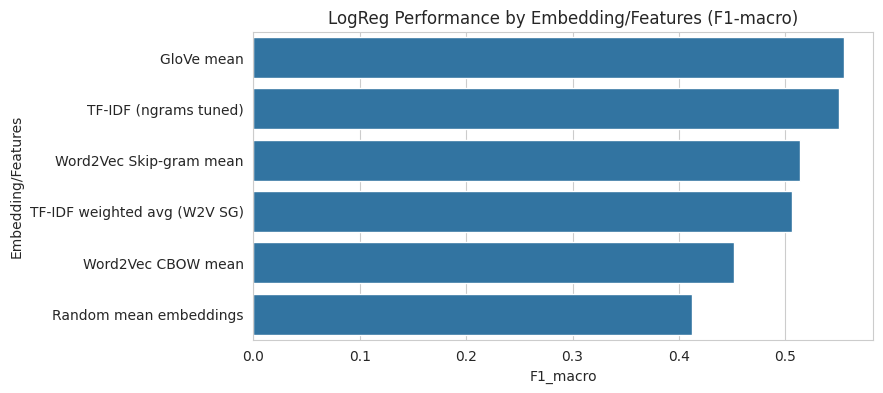

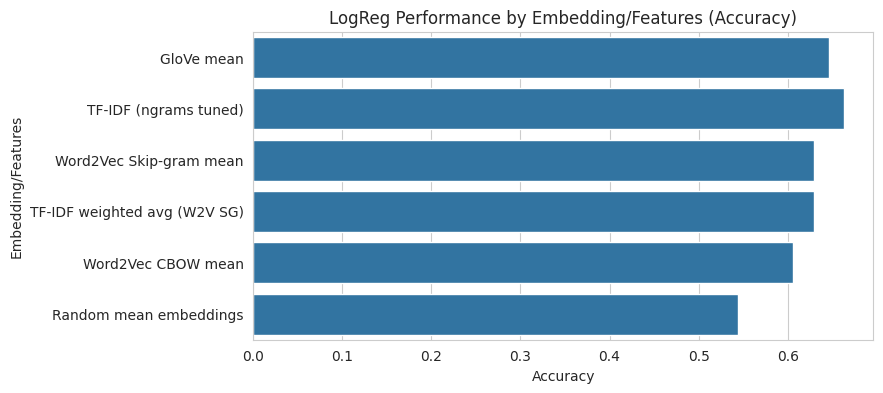

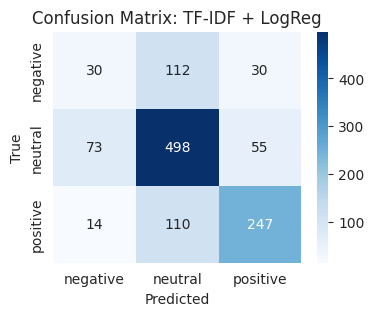

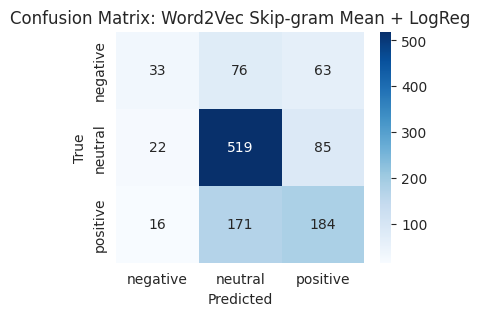

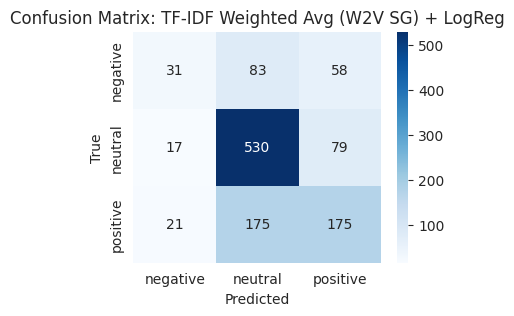

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="F1_macro", y="Embedding/Features")
plt.title("LogReg Performance by Embedding/Features (F1-macro)")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x="Accuracy", y="Embedding/Features")
plt.title("LogReg Performance by Embedding/Features (Accuracy)")
plt.show()

def plot_cm(cm, title):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_cm(cm_tfidf, "Confusion Matrix: TF-IDF + LogReg")
plot_cm(cm_sg, "Confusion Matrix: Word2Vec Skip-gram Mean + LogReg")
plot_cm(cm_wavg, "Confusion Matrix: TF-IDF Weighted Avg (W2V SG) + LogReg")

**Save Best Model and Result**

In [33]:
# Save The Best Model and Result Table for Team Merge or Comparison Analysis

import joblib

OUT_DIR = "/mnt/data/lr_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Save results table
results_path = os.path.join(OUT_DIR, "logreg_embedding_comparison.csv")
results_df.to_csv(results_path, index=False)

# Save best estimator (top by macro F1)
best_row = results_df.iloc[0]
best_name = best_row["Embedding/Features"]

best_model_map = {
    "TF-IDF (ngrams tuned)": grid_tfidf.best_estimator_,
    "Random mean embeddings": grid_rand.best_estimator_,
    "Word2Vec Skip-gram mean": grid_sg.best_estimator_,
    "Word2Vec CBOW mean": grid_cb.best_estimator_,
    "GloVe mean": grid_gl.best_estimator_,
    "TF-IDF weighted avg (W2V SG)": grid_wavg.best_estimator_
}

best_estimator = best_model_map[best_name]
model_path = os.path.join(OUT_DIR, f"best_logreg_{best_name.replace(' ','_').replace('/','_')}.joblib")
joblib.dump(best_estimator, model_path)

print("Saved:", results_path)
print("Saved:", model_path)

Saved: /mnt/data/lr_outputs/logreg_embedding_comparison.csv
Saved: /mnt/data/lr_outputs/best_logreg_GloVe_mean.joblib
